In [ ]:
import csv
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


drive.mount('/content/drive')
lbcode = LabelEncoder()
filePath = "/content/drive/MyDrive/Housing.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(filePath)
df = df.fillna(df.mean())                                                       #correted NAN in numeric columns

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
ColumnsNeedToBeScaled=['area','price']
df[ColumnsNeedToBeScaled]=minmax.fit_transform(df[ColumnsNeedToBeScaled])

for i in range(len(df.columns)):
    if(df.dtypes[i] == 'O'):
        df[df.columns[i]] = lbcode.fit_transform(df[df.columns[i]])             #Categorical encoding of columns with dtype: object

scaler = StandardScaler()
x= df.drop('price', axis = 1)                                                 #drop output from dataset and store in x
y= df.price 
                                                                  #define y as output

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

x_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.298969,3,2,4,1,0,0,0,1,1,0,0
93,0.381443,3,2,1,1,0,1,0,1,3,0,1
335,0.148866,2,1,1,1,0,1,0,1,2,0,0
412,0.065979,3,1,2,1,0,1,0,0,0,1,2
471,0.144330,3,1,2,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,4,2,4,1,0,0,0,1,0,0,2
106,0.261168,4,2,1,1,0,1,0,1,0,1,1
270,0.195876,3,2,3,1,0,0,1,0,1,0,0
435,0.164261,2,1,1,1,0,0,0,0,0,0,2


#Q1

1] 1)

In [ ]:
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)
print(r2_score( y_test,pred))
print(mse( y_test,pred))

0.48153832735177227
0.019644316594109038


1] 2)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

splitsx = np.array_split(x_train, 5)
splitsY = np.array_split(y_train, 5)
r2_scores = []

for tempDepth in range(4, 100):
    tempmse = []
    for i in range(len(splitsx)):
        tempTrainx = pd.concat([splitsx[(i + 1)%5], splitsx[(i + 2)%5], splitsx[(i + 3)%5], splitsx[(i + 4)%5]], axis = 0)
        tempTestx = splitsx[i]
        tempTrainY = pd.concat([splitsY[(i + 1)%5], splitsY[(i + 2)%5], splitsY[(i + 3)%5], splitsY[(i + 4)%5]], axis = 0)
        tempTestY = splitsY[i]
        
        model = DecisionTreeRegressor(max_depth=tempDepth)
        model.fit(tempTrainx, tempTrainY)
        tempmse.append(r2_score( tempTestY, model.predict(tempTestx)))

    r2_scores.append(sum(tempmse)/len(tempmse))

bestDepth = r2_scores.index(max(r2_scores)) + 4
bestDepth




4

 1] 3)

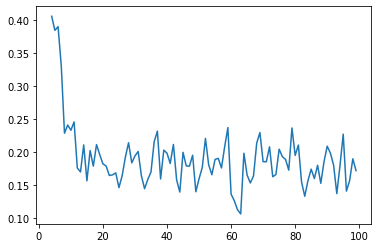

In [ ]:
plt.plot(range(4,100),r2_scores)


1] 4)

In [ ]:
#436 number of rows
import random

trainXList = []
trainYList = []
indx = x_train.index
n_estimators = 10

for i in range(n_estimators):
    tempTrainList = []
    temptrainYList = []
    for j in range(277):
        index = random.randint(0,435)
        row = (x_train.loc[indx[index]])

        tempTrainList.append(row)
        temptrainYList.append(y_train.loc[indx[index]])
                            
    trainXList.append(pd.DataFrame(tempTrainList))
    trainYList.append(pd.DataFrame(temptrainYList))

print(trainYList)
print(trainXList)




[            0
0    0.078788
1    0.169697
2    0.151515
3    0.133333
4    0.115758
..        ...
272  0.180606
273  0.363636
274  0.144848
275  0.251515
276  0.212121

[277 rows x 1 columns],             0
0    0.103030
1    0.330303
2    0.239394
3    0.254545
4    0.045455
..        ...
272  0.448485
273  0.175152
274  0.345455
275  0.030303
276  0.103030

[277 rows x 1 columns],             0
0    0.369697
1    0.133333
2    0.575758
3    0.229697
4    0.066667
..        ...
272  0.045455
273  0.154545
274  0.836364
275  0.247879
276  0.139394

[277 rows x 1 columns],             0
0    0.157576
1    0.142424
2    0.109091
3    0.363636
4    0.587879
..        ...
272  0.448485
273  0.242424
274  0.333333
275  0.293939
276  0.181818

[277 rows x 1 columns],             0
0    0.236364
1    0.054545
2    0.163636
3    0.363636
4    0.127273
..        ...
272  0.209091
273  0.548133
274  0.566667
275  0.236364
276  0.163636

[277 rows x 1 columns],             0
0    0.300000
1    0

1] 5)6)

[0.23822477093215388, 0.5252367504233699, 0.4951468154156897, 0.4086955315513381, 0.4663183005522158, 0.3536695288585233, 0.39614410052701876, 0.3432672079829109, 0.3318295170098666, 0.39486376721277283]
Average score:  0.3953396290465859


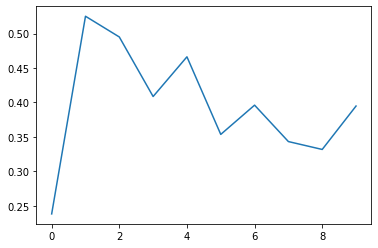

In [ ]:
scores = []
for i in range(n_estimators):
    model = DecisionTreeRegressor(max_depth = bestDepth)
    model.fit(trainXList[i], trainYList[i])

    scores.append(r2_score(y_test, model.predict(x_test)))

print(scores)
print("Average score: ", sum(scores)/len(scores))

ratio = [0 for i in range(n_estimators)]
for i in range(n_estimators):
    ratio[i] = scores[i] / sum(scores)

plt.plot(range(0,10), scores)

1] 7)8)

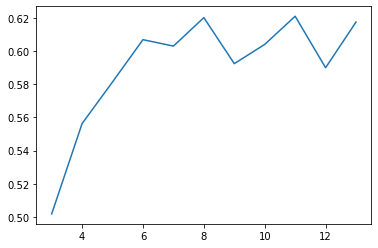

In [ ]:
def FindScore(trainXList, trainYList, maxDepth, x_test, y_test):
    pred = [0 for i in range(len(x_test))]
    for i in range(n_estimators):
        model = DecisionTreeRegressor(max_depth = maxDepth)
        model.fit(trainXList[i], trainYList[i])
        tempPred = model.predict(x_test)

        for j in range(len(x_test)):
            pred[j] += tempPred[j] * ratio[i]

    return r2_score(y_test, pred)

scores1 = []
for j in range(bestDepth - 1, bestDepth+10):
    scores1.append(FindScore(trainXList, trainYList, j, x_test, y_test))

plt.plot(range(bestDepth-1, bestDepth+10), scores1)

1] 9)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model = RandomForestRegressor(max_depth = bestDepth, n_estimators = n_estimators)
model.fit(x_train, y_train)

print("r2_score :            ", r2_score(y_test, model.predict(x_test)))
print("Mean Squared Error :  ", mse(y_test, model.predict(x_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, model.predict(x_test)))

r2_score :             0.600387663453186
Mean Squared Error :   0.015141160221043974
Mean Absolute Error :  0.09330493695772117


1] 10)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators = n_estimators)
model.fit(x_train, y_train)

print("r2_score :            ", r2_score(y_test, model.predict(x_test)))
print("Mean Squared Error :  ", mse(y_test, model.predict(x_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, model.predict(x_test)))


r2_score :             0.5184008456951985
Mean Squared Error :   0.018247609722614338
Mean Absolute Error :  0.10528168837052339


#Q2

In [ ]:
filePath = "/content/drive/MyDrive/Breast_cancer_data.csv"
df = pd.read_csv(filePath)
x= df.drop('diagnosis', axis = 1)                                                 #drop output from dataset and store in x
y= df.diagnosis 
                                                                  #define y as output

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: diagnosis, Length: 455, dtype: int64

2] 1)

In [ ]:
model = DecisionTreeRegressor(max_depth = 10)
model.fit(x_train, y_train)
print(acc(y_test, model.predict(x_test)))

0.9122807017543859


2] 2)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

splitsx = np.array_split(x_train, 5)
splitsY = np.array_split(y_train, 5)
r2_scores = []

for tempDepth in range(2, 25):
    tempmse = []
    for i in range(len(splitsx)):
        tempTrainx = pd.concat([splitsx[(i + 1)%5], splitsx[(i + 2)%5], splitsx[(i + 3)%5], splitsx[(i + 4)%5]], axis = 0)
        tempTestx = splitsx[i]
        tempTrainY = pd.concat([splitsY[(i + 1)%5], splitsY[(i + 2)%5], splitsY[(i + 3)%5], splitsY[(i + 4)%5]], axis = 0)
        tempTestY = splitsY[i]
        
        model = DecisionTreeRegressor(max_depth=tempDepth)
        model.fit(tempTrainx, tempTrainY)
        tempmse.append(acc( tempTestY, model.predict(tempTestx).round()))

    r2_scores.append(sum(tempmse)/len(tempmse))

bestDepth = r2_scores.index(max(r2_scores)) + 2
bestDepth

8

2] 3)

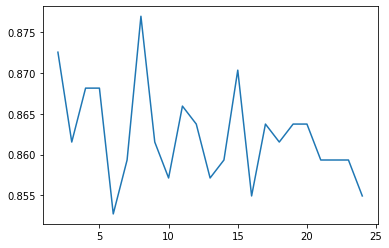

In [ ]:
plt.plot(range(2,25),r2_scores)

2] 4)

In [ ]:
!pip install xgboost
!pip install lightgbm
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(subsample = 0.7, max_depth = 4)
model.fit(x_train, y_train)

XGBClassifier(max_depth=4, subsample=0.7)

2] 5)

In [ ]:
print("Accuracy on training data: ", acc(y_train, model.predict(x_train)) *100, "%")
print("Accuracy on testing data: ",acc(y_test, model.predict(x_test)) *100, "%")

Accuracy on training data:  98.46153846153847 %
Accuracy on testing data:  95.6140350877193 %


2] 6)

In [ ]:
import lightgbm

trainData = lightgbm.Dataset(x_train, label = y_train)
testData = lightgbm.Dataset(x_test, label = y_test)

parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 5,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1,
              'max_depth': 3
             }

accs = []
for i in range(3,25, 2):
    parameters['num_leaves'] = i
    model = lightgbm.train(parameters, trainData, valid_sets = testData)
    accs.append(acc(y_test, model.predict(x_test).round()) * 100)

print("The value of num_leaves for best result whne tree depth is set to three: ", accs.index(max(accs))*2 + 3)

[1]	valid_0's auc: 0.9566
[2]	valid_0's auc: 0.962005
[3]	valid_0's auc: 0.964297
[4]	valid_0's auc: 0.976417
[5]	valid_0's auc: 0.979692
[6]	valid_0's auc: 0.98002
[7]	valid_0's auc: 0.981657
[8]	valid_0's auc: 0.98133
[9]	valid_0's auc: 0.981657
[10]	valid_0's auc: 0.983786
[11]	valid_0's auc: 0.983459
[12]	valid_0's auc: 0.986407
[13]	valid_0's auc: 0.986407
[14]	valid_0's auc: 0.987389
[15]	valid_0's auc: 0.986734
[16]	valid_0's auc: 0.986734
[17]	valid_0's auc: 0.987717
[18]	valid_0's auc: 0.986734
[19]	valid_0's auc: 0.987389
[20]	valid_0's auc: 0.988045
[21]	valid_0's auc: 0.989519
[22]	valid_0's auc: 0.989519
[23]	valid_0's auc: 0.989191
[24]	valid_0's auc: 0.986243
[25]	valid_0's auc: 0.986243
[26]	valid_0's auc: 0.985752
[27]	valid_0's auc: 0.985097
[28]	valid_0's auc: 0.986079
[29]	valid_0's auc: 0.985097
[30]	valid_0's auc: 0.986079
[31]	valid_0's auc: 0.986079
[32]	valid_0's auc: 0.986079
[33]	valid_0's auc: 0.986079
[34]	valid_0's auc: 0.986079
[35]	valid_0's auc: 0.98542

2] 7)

[97.36842105263158, 98.24561403508771, 97.36842105263158, 97.36842105263158, 94.73684210526315, 95.6140350877193, 96.49122807017544, 96.49122807017544, 96.49122807017544, 97.36842105263158, 96.49122807017544, 96.49122807017544, 96.49122807017544]


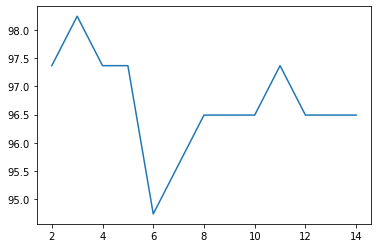

In [ ]:
accs1 = []
def do():
    parameters['max_depth'] = i;
    parameters['num_leaves'] = pow(2,i)
    model = lightgbm.LGBMClassifier(max_depth = i, num_leaves = pow(2,i))
    model.fit(x_train, y_train)
    accs1.append(acc(y_test, model.predict(x_test).round()) * 100)

for i in range(2,15):
    do()

print(accs1)
plt.plot(range(2,15), accs1)

2] 8)

In [ ]:
# Pre-pruning and post-pruning techniques can be used to handle the problem of overfitting. 
# Just by training, the Random Forest model with the default hyperparameters cannot completely attenuate the problem of overfitting.
# Hyperparameters such as max_depth, min_samples_leaf, min_samples_split can be tuned in order for a good model.
# max_depth is - as its name suggests - the maximum depth of the decision tree design.
# min_samples_leaf guarantees a minimum number of samples allowed in a leaf.
# min_samples_split specifies the minimum number of samples required to split an internal node